### 1. Term Weighting (TF-IDF and BM25)

In [ ]:
# TF-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "I'm designing a document and don't want to get bogged down in what the text actually says",
    "I'm creating a template for various paragraph styles and need to see what they will look like.",
    "I'm trying to learn more about some features of Microsoft Word and don't want to practice on a real document"
]

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Print TF-IDF weights for each word in the corpus
df = pd.DataFrame(tfidf_matrix.toarray().transpose(), columns=['First_Para', 'Second_Para', 'Third_Para'], index=tfidf_vectorizer.get_feature_names_out())
print(df)

[[0.         0.         0.25416974]
 [0.28853988 0.         0.        ]
 [0.1704163  0.16209543 0.15011674]
 [0.28853988 0.         0.        ]
 [0.         0.27445143 0.        ]
 [0.28853988 0.         0.        ]
 [0.21944202 0.         0.19330264]
 [0.21944202 0.         0.19330264]
 [0.28853988 0.         0.        ]
 [0.         0.         0.25416974]
 [0.         0.27445143 0.        ]
 [0.28853988 0.         0.        ]
 [0.28853988 0.         0.        ]
 [0.         0.         0.25416974]
 [0.         0.27445143 0.        ]
 [0.         0.27445143 0.        ]
 [0.         0.         0.25416974]
 [0.         0.         0.25416974]
 [0.         0.27445143 0.        ]
 [0.         0.         0.25416974]
 [0.         0.         0.25416974]
 [0.         0.27445143 0.        ]
 [0.         0.         0.25416974]
 [0.         0.         0.25416974]
 [0.28853988 0.         0.        ]
 [0.         0.27445143 0.        ]
 [0.         0.         0.25416974]
 [0.         0.27445143 0.  

In [18]:
# BM25
from rank_bm25 import BM25Okapi

corpus = [
    "I'm designing a document and don't want to get bogged down in what the text actually says",
    "I'm creating a template for various paragraph styles and need to see what they will look like.",
    "I'm trying to learn more about some features of Microsoft Word and don't want to practice on a real document"
]

tokenized_corpus = [doc.split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

In [19]:
query = "and"
tokenized_query = query.split(" ")
doc_scores = bm25.get_scores(tokenized_query)
print([len(sent) for sent in tokenized_corpus])
print(doc_scores)

[17, 17, 20]
[0.04396687 0.04396687 0.04082638]


### 2. Topic Modeling (LDA, LSA, and NMF)

In [20]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "I'm designing a document and don't want to get bogged down in what the text actually says",
    "I'm creating a template for various paragraph styles and need to see what they will look like.",
    "I'm trying to learn more about some features of Microsoft Word and don't want to practice on a real document"
]

# Convert to document-term matrix
vectorizer = CountVectorizer()
dt_matrix = vectorizer.fit_transform(corpus)
df = pd.DataFrame(dt_matrix.toarray().T, index=vectorizer.get_feature_names_out(), columns=['Document 1', 'Document 2', 'Document 3'])
print(df)

           Document 1  Document 2  Document 3
about               0           0           1
actually            1           0           0
and                 1           1           1
bogged              1           0           0
creating            0           1           0
designing           1           0           0
document            1           0           1
don                 1           0           1
down                1           0           0
features            0           0           1
for                 0           1           0
get                 1           0           0
in                  1           0           0
learn               0           0           1
like                0           1           0
look                0           1           0
microsoft           0           0           1
more                0           0           1
need                0           1           0
of                  0           0           1
on                  0           0 

In [21]:
# LDA
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA with 2 topics
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(dt_matrix)

# Top 5 terms for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

Topic 1:
['see', 'template', 'will', 'and', 'what']
Topic 2:
['document', 'don', 'want', 'and', 'to']


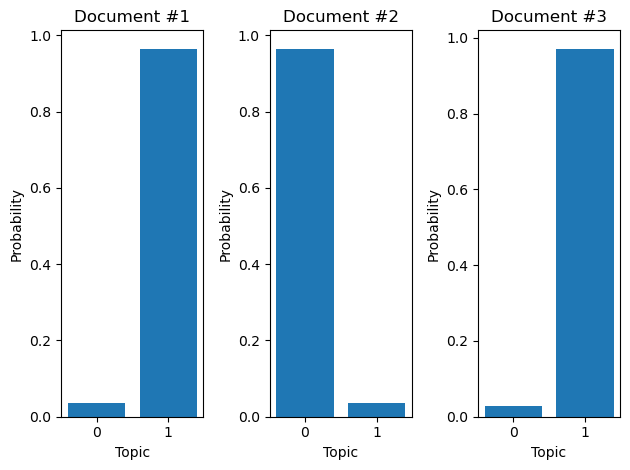

In [22]:
import matplotlib.pyplot as plt
doc_topic_distributions = lda.transform(dt_matrix)

# Plot topic distributions for each document
for i, topic_dist in enumerate(doc_topic_distributions):
    plt.subplot(1, len(doc_topic_distributions), i+1)
    plt.bar(range(len(topic_dist)), topic_dist)
    plt.xlabel("Topic")
    plt.ylabel("Probability")
    plt.title(f"Document #{i + 1}")
plt.tight_layout()
plt.show()

In [23]:
import pyLDAvis
import pyLDAvis.lda_model

# Interactive visualization
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.lda_model.prepare(lda, dt_matrix, vectorizer)
pyLDAvis.display(lda_vis)

ModuleNotFoundError: No module named 'pyLDAvis'

In [ ]:
# LSA
from sklearn.decomposition import TruncatedSVD

# Apply LSA
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(dt_matrix)

# Top 5 terms for each topic
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lsa.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

Topic 1:
['don', 'document', 'want', 'and', 'to']
Topic 2:
['need', 'creating', 'will', 'for', 'what']


In [ ]:
# NMF
from sklearn.decomposition import NMF

# Apply NMF
nmf = NMF(n_components=2, random_state=42)
nmf_matrix = nmf.fit_transform(dt_matrix)

# Top 5 terms for each topic
for idx, topic in enumerate(nmf.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

Topic 1:
['and', 'don', 'document', 'want', 'to']
Topic 2:
['creating', 'template', 'for', 'and', 'what']


### 3. Dimensionality Reduction (PCA and SVD)

In [ ]:
# PCA
from sklearn.decomposition import PCA
import numpy as np

# TF-IDF matrix from part 1, you can try with dt_martix from part 2 as well
tfidf_data = tfidf_matrix.toarray()

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_data)
print(f"TF-IDF matrix shape: {tfidf_data.shape}, PCA result shape: {pca_result.shape}")
print("PCA Result:\n", pca_result)

TF-IDF matrix shape: (3, 39), PCA result shape: (3, 2)
PCA Result:
 [[-0.32601082  0.66409799]
 [ 0.79316674 -0.07437316]
 [-0.46715592 -0.58972484]]


In [ ]:
# SVD
from scipy.linalg import svd

matrix = tfidf_matrix.toarray()

# Apply SVD
U, S, VT = svd(matrix)
print("U Matrix:\n", U)
print("Singular Values:\n", S)
print("VT Matrix:\n", VT)

U Matrix:
 [[-0.65236149  0.21581789 -0.72653089]
 [-0.4262222  -0.89712207  0.11621798]
 [-0.62670498  0.38547973  0.67723427]]
Singular Values:
 [1.1233886  0.97176315 0.89088408]
VT Matrix:
 [[-0.14179371 -0.16755761 -0.24420812 ... -0.20662464 -0.10412896
  -0.14179371]
 [ 0.10082424  0.06408153 -0.05224889 ... -0.14395939 -0.25337083
   0.10082424]
 [ 0.19321533 -0.23530911 -0.00371552 ... -0.15172965  0.03580285
   0.19321533]
 ...
 [-0.26561053  0.11244189  0.06528572 ...  0.88926219 -0.0573219
   0.03409836]
 [-0.07497043  0.2548106  -0.001205   ... -0.07345862  0.92345757
   0.01258648]
 [-0.01211171 -0.00646543 -0.2616498  ...  0.03198173  0.01338266
   0.93542774]]


### Practice for the Week
With the techniques you have learned in this course so far, you can have a taste of how to work with real-world data sets and apply the techniques you have learned to solve problems now. Recap data preprocessing techniques and information extraction and apply them to preprocess Corona_NLP_train dataset and analysis the data with the unsupervised learning algorithms.

In [ ]:
# Import more necessary modules
import pandas as pd
import numpy as np
import re 
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['https', 'tco'])

# Download the csv file from EE6405 and place it in the same directory as the notebook
# Load the csv file into a pandas dataframe
tweets = pd.read_csv(r"Corona_NLP_train.csv", encoding='latin-1')

tweets = tweets.drop(columns=['ï»¿UserName', 'ScreenName', 'Location','TweetAt','Sentiment'], axis=1).sample(100)

# Have an idea of the data
tweets.head()

,OriginalTweet
3977,So I did NOT stockpile food or anything. But n...
30891,PROTECT YOURSELF AND OTHERS FROM COVID-19\r\r\...
9132,India should not let this crash in oil prices ...
24476,Food for People seeing rise in demand amid COV...
6617,Why do people gotta be assholes and hoard pet ...


In [ ]:
# Data preprocessing (Eg., Remove punctuation, stop words, and stemming)

# Vectorize the text data (TF-IDF, Count Vectorizer, etc.)

# Split into train and validation sets. Remember to set the random seed for reproducibility

# Apply dimensionality reduction (Optional)

# Apply different topic modeling techniques on the train set

# Evaluate the performance of the model on the testing set

Extension (Optional, not tested in the quiz)

In [ ]:
corpus = [
    "I'm designing a document and don't want to get bogged down in what the text actually says",
    "I'm creating a template for various paragraph styles and need to see what they will look like.",
    "I'm trying to learn more about some features of Microsoft Word and don't want to practice on a real document"
]

In [ ]:
## LDA
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import Sparse2Corpus

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
lda_model = LatentDirichletAllocation(n_components=2, random_state=0)
lda_model.fit(X)

# Top 5 terms for each topic
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

Topic 1:
['and', 'want', 'don', 'document', 'to']
Topic 2:
['template', 'for', 'to', 'and', 'what']


In [ ]:
# perplexity
perplexity = lda_model.perplexity(X)
print(f"Perplexity: {perplexity}")

# coherence, we use gensim for better capabilities
gensim_corpus = Sparse2Corpus(X, documents_columns=False)
id2word = Dictionary([text.split() for text in corpus])

# coherence Model
topics = lda_model.components_
words = [vectorizer.get_feature_names_out()[i] for i in np.argsort(topics[0])[::-1]]
coherence_model = CoherenceModel(topics=[words], texts=[text.split() for text in corpus], dictionary=id2word)
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score}")

Perplexity: 63.16331266799262
Coherence Score: 0.305394545830141


In [ ]:
## pLSA
from plsa import Corpus, Pipeline
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

pipeline = Pipeline(*DEFAULT_PIPELINE)
plsa_corpus = Corpus(corpus=corpus, pipeline=pipeline)
plsa = PLSA(corpus=plsa_corpus, n_topics=2, tf_idf=True)
plsa

PLSA:
====
Number of topics:     2
Number of documents:  3
Number of words:      9
Number of iterations: 0

In [ ]:
result = plsa.fit()
plsa

PLSA:
====
Number of topics:     2
Number of documents:  3
Number of words:      9
Number of iterations: 10

In [ ]:
result.topic

array([0.65667753, 0.34332247])

In [ ]:
# top-3 words in each topic.
print("Topic 1:")
print(result.word_given_topic[0][:3])
print("Topic 2:")
print(result.word_given_topic[1][:3])

Topic 1:
(('text', 0.17427248448252766), ('feature', 0.17427248448252766), ('word', 0.17427248448252766))
Topic 2:
(('template', 0.3333333333333333), ('paragraph', 0.3333333333333333), ('style', 0.3333333333333333))


In [ ]:
# predict the topic mixture of an entirely new document
new_doc = "Hello! The code and text in the extension is not tested in the quiz."

topic_components, number_of_new_words, new_words = result.predict(new_doc)

print('Relative topic importance in new document:', topic_components)
print('Number of previously unseen words in new document:', number_of_new_words)
print('Previously unseen words in new document:', new_words)

Relative topic importance in new document: [1. 0.]
Number of previously unseen words in new document: 3
Previously unseen words in new document: ('code', 'extension', 'quiz')
